
# Lab 1 - Image Processing - Segmentation & Registration




This TP / assignment aims to allow you to explore different segmentation and registration methods.

The data we'll use is from this github : https://github.com/adalca/medical-datasets/blob/master/neurite-oasis.md
Which are MRI images of brains.

Documents to submit :
* This notebook with your code and comments.
* A report (pdf format) to present the results of your different methods, how you implemented them, how they work, their differences, their strengths and their weaknesses. You can use LaTex or Typst for your report.

Only one student needs to submit for their group.


Student Name(s) (up to 4 for each group) :


1.   First Name, Last Name, student ID (matricule) :
2.   First Name, Last Name, student ID (matricule) :
3. ...
4.


### **Evaluation**

#### Segmentation (10 points)

Code : 3 points.

Report : 7 points. 3.5 points to present your results. 3.5 points to discuss your methods (how you implemented them, how they work, their differences, their strengths and their weaknesses).

#### Registration (10 points)

Code : 3 points.

Report : 7 points. 3.5 points to present your results. 3.5 points to discuss your methods (how you implemented them, how they work, their differences, their strengths and their weaknesses).

**Total : 20 points.**



### import libraries

In [3]:
import os
import tarfile
import urllib.request
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

### Data preparation

Extracting example data...
Data ready in 'student_data/'. Files: image.nii.gz, seg.nii.gz


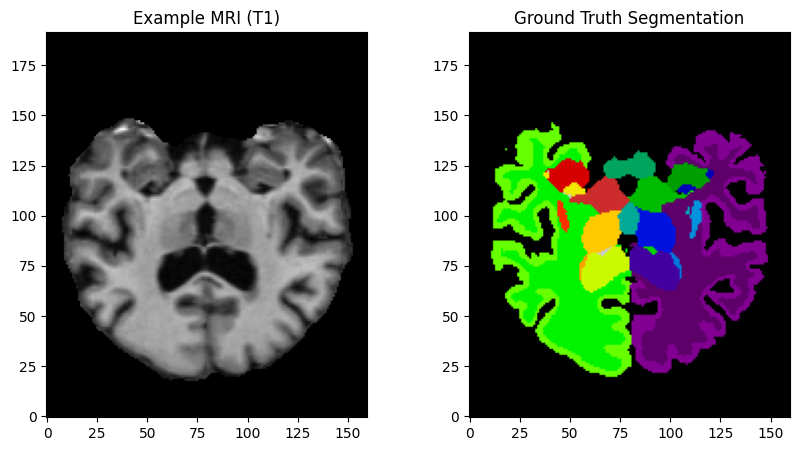

In [4]:

# 1. Download the lightweight 2D Neurite-OASIS dataset (approx 24MB)
url = "https://surfer.nmr.mgh.harvard.edu/ftp/data/neurite/data/neurite-oasis.2d.v1.0.tar"
tar_path = "neurite-oasis.2d.v1.0.tar"

if not os.path.exists(tar_path):
    print("Downloading dataset (24MB)...")
    urllib.request.urlretrieve(url, tar_path)
    print("Download complete.")

# 2. Extract one specific subject to serve as the example
# We will use subject 'OASIS_OAS1_0001_MR1'
subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

print("Extracting example data...")
with tarfile.open(tar_path, "r") as tar:


    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg24.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: image.nii.gz, seg.nii.gz")

# 3. Visualize the data
img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Example MRI (T1)")
plt.subplot(1, 2, 2)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Ground Truth Segmentation")
plt.show()

In [ ]:
# If you want to get access to the other data

subject_ids_in_tar = set()

with tarfile.open(tar_path, "r") as tar:
    for member in tar.getmembers():
        if "slice_norm.nii.gz" in member.name:
            parts = member.name.split('/')
            if len(parts) > 0:
                subject_id = parts[0].split('_data')[0] # Get 'OASIS_OAS1_0001_MR1'
                subject_ids_in_tar.add(subject_id)

print(f"Total unique subjects found in the tar file: {len(subject_ids_in_tar)}")
print("Available Subject IDs:")
for sid in sorted(list(subject_ids_in_tar)): # Sort for consistent output
    print(f"- {sid}") 


In [ ]:
# Done by me
# List all files in tar for 1 subject_id

subject_id = "OASIS_OAS1_0001_MR1"

with tarfile.open(tar_path, "r") as tar:
    subject_files = [m.name for m in tar.getmembers() if subject_id in m.name]

for f in subject_files:
    print(f)

# Segmentation

This code provides you a segmentation with 4 classes.

In [ ]:
subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data"
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg4.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, "image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, "seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: image.nii.gz, seg.nii.gz")

# 3. Visualize the data
img = nib.load(os.path.join(output_dir, "image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, "seg.nii.gz")).get_fdata().squeeze()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Example MRI (T1)")
plt.subplot(1, 2, 2)
plt.imshow(seg.T, cmap='nipy_spectral', origin='lower')
plt.title("Ground Truth Segmentation")
plt.show()

There are plenty of classes for the segmentation. You can do a simpler segmentation where you have 4 labels (instead of 24). It's up to you.

## Methods

You have to do a segmentation of the previous image showed.
You need to use 2 different methods. Explain the differences between these methods.

### List of possible methods (you can use other methods!) :

#### Multi-Otsu Thresholding

* [Reference](https://ieeexplore.ieee.org/document/4310076)

* [Python implementation](https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_multiotsu.html)
####   Gaussian Mixture Models (GMM)

* [Reference](https://towardsdatascience.com/gaussian-mixture-models-gmms-from-theory-to-implementation-4406c7fe9847/)

* [Python implementation](https://scikit-learn.org/stable/modules/mixture.html)
####   U-Net (Deep Learning)
* [Reference](https://arxiv.org/abs/1505.04597)
* Python implementation : use Pytorch

#### Random Walker
* [Reference](https://ieeexplore.ieee.org/document/1704833)
* [Python implementation](https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_random_walker_segmentation.html)



### Method 1

In [ ]:
#Multi otsu

from skimage.filters import threshold_multiotsu


# Retrieve img subject

subject_id = "OASIS_OAS1_0001_MR1"
output_dir = "student_data/otsu"
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(tar_path, "r") as tar:
    img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
    seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg4.nii.gz" in m.name][0]

    # Extract and rename for simplicity
    f_img = tar.extractfile(img_member)
    f_seg = tar.extractfile(seg_member)

    with open(os.path.join(output_dir, subject_id + "_image.nii.gz"), "wb") as out:
        out.write(f_img.read())
    with open(os.path.join(output_dir, subject_id + "_seg.nii.gz"), "wb") as out:
        out.write(f_seg.read())

print(f"Data ready in '{output_dir}/'. Files: {subject_id}_image.nii.gz, {subject_id}_seg.nii.gz")

# Apply Multi Otsu
img = nib.load(os.path.join(output_dir, subject_id + "_image.nii.gz")).get_fdata().squeeze()
seg = nib.load(os.path.join(output_dir, subject_id + "_seg.nii.gz")).get_fdata().squeeze()

#Mask BG
mask = seg > 0
pixels = img[mask]

thresholds = threshold_multiotsu(pixels, 4)

seg_mo = np.zeros_like(img, dtype=np.int32)
seg_mo[mask] = np.digitize(img[mask], bins=thresholds) + 1


fig, ax = plt.subplots(1, 4, figsize=(10, 4))

ax[0].imshow(img.T, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

ax[2].imshow(seg_mo.T, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

ax[3].imshow(seg.T, cmap='jet')
ax[3].set_title('Ground truth')
ax[3].axis('off')


plt.show()

### Method 2

In [ ]:
# If you want to get access to the other data

subject_ids_in_tar = set()

with tarfile.open(tar_path, "r") as tar:
    for member in tar.getmembers():
        if "slice_norm.nii.gz" in member.name:
            parts = member.name.split('/')
            if len(parts) > 0:
                subject_id = parts[0].split('_data')[0] 
                subject_ids_in_tar.add(subject_id)



for subject_id in subject_ids_in_tar:
    output_dir = "student_data"
    os.makedirs(output_dir, exist_ok=True)

    with tarfile.open(tar_path, "r") as tar:
        img_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_norm.nii.gz" in m.name][0]
        seg_member = [m for m in tar.getmembers() if subject_id in m.name and "slice_seg4.nii.gz" in m.name][0]

        # Extract and rename for simplicity
        f_img = tar.extractfile(img_member)
        f_seg = tar.extractfile(seg_member)

        with open(os.path.join(output_dir, subject_id + "_image.nii.gz"), "wb") as out:
            out.write(f_img.read())
        with open(os.path.join(output_dir, subject_id + "_seg4.nii.gz"), "wb") as out:
            out.write(f_seg.read())

    print(f"Data ready in '{output_dir}/'. Files: {subject_id}_image.nii.gz, {subject_id}_seg4.nii.gz")



In [ ]:
import sys, torch, numpy, matplotlib, nibabel, skimage
print(sys.executable)
print(torch.__version__)
print(torch.cuda.is_available())
print(numpy.__version__)
print(matplotlib.__version__)
print(nibabel.__version__)
print(skimage.__version__)


In [ ]:
# U-net

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split

class DoubleConv(nn.Module):
    def __init__(self, c_in, c_out):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(c_in, c_out, kernel_size=3, padding=1),
            nn.BatchNorm2d(c_out),
            nn.ReLU(inplace=True),

            nn.Conv2d(c_out, c_out, kernel_size=3, padding=1),
            nn.BatchNorm2d(c_out),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.block(x)
    
class UNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        # Encoder
        self.enc1 = DoubleConv(1, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = DoubleConv(512, 1024)

        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = DoubleConv(1024, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = DoubleConv(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = DoubleConv(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = DoubleConv(128, 64)

        self.outconv = nn.Conv2d(64, n_classes, kernel_size=1)
    
    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)       # (B, 64, 160, 192)
        p1 = self.pool1(e1)    # (B, 64, 80, 96)

        e2 = self.enc2(p1)     # (B, 128, 80, 96)
        p2 = self.pool2(e2)    # (B, 128, 40, 48)

        e3 = self.enc3(p2)     # (B, 256, 40, 48)
        p3 = self.pool3(e3)    # (B, 256, 20, 24)

        e4 = self.enc4(p3)     # (B, 512, 20, 24)
        p4 = self.pool4(e4)    # (B, 512, 10, 12)

        # Bottleneck
        b = self.bottleneck(p4)  # (B, 1024, 10, 12)

        # Decoder
        u4 = self.up4(b)                 # (B, 512, 20, 24)
        d4 = self.dec4(torch.cat([u4, e4], dim=1))

        u3 = self.up3(d4)                # (B, 256, 40, 48)
        d3 = self.dec3(torch.cat([u3, e3], dim=1))

        u2 = self.up2(d3)                # (B, 128, 80, 96)
        d2 = self.dec2(torch.cat([u2, e2], dim=1))

        u1 = self.up1(d2)                # (B, 64, 160, 192)
        d1 = self.dec1(torch.cat([u1, e1], dim=1))

        out = self.outconv(d1)           # (B, 5, 160, 192)

        return out


class MRIDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Args:
            data_dir (str): path to folder containing MRI and seg files
            transform (callable, optional): optional transform on image and mask
        """
        self.data_dir = data_dir
        self.transform = transform

        # collect all image files
        self.image_files = sorted([f for f in os.listdir(data_dir) if f.endswith("_image.nii.gz")])
        self.mask_files  = [f.replace("_image.nii.gz", "_seg4.nii.gz") for f in self.image_files]

        # every image must have a corresponding mask
        for m in self.mask_files:
            if not os.path.exists(os.path.join(data_dir, m)):
                raise FileNotFoundError(f"Missing mask for {m}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.data_dir, self.image_files[idx])
        mask_path = os.path.join(self.data_dir, self.mask_files[idx])

        # load MRI and mask
        img = nib.load(img_path).get_fdata().squeeze()
        mask = nib.load(mask_path).get_fdata().squeeze()

        # ensure correct types
        img = np.array(img, dtype=np.float32)
        mask = np.array(mask, dtype=np.int64)

        # add channel dimension to image
        img = np.expand_dims(img, axis=0)

        # optional transforms
        if self.transform:
            img, mask = self.transform(img, mask)

        return torch.tensor(img, dtype=torch.float32), torch.tensor(mask, dtype=torch.long)

    


In [ ]:
data_dir = "student_data"  # folder containing all *_image.nii.gz and *_seg4.nii.gz

dataset = MRIDataset(data_dir)

train_size = int(0.8 * len(dataset))
val_size   = len(dataset) - train_size

train_dataset, val_dataset = random_split(
    dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # reproducibility
)


batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=0)

In [ ]:


#Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_classes=5).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

#Quick test
num_epochs = 10

for epoch in range(num_epochs):

    # ---------- TRAIN ----------
    model.train()
    train_loss = 0.0

    for imgs, masks in train_loader:
        imgs  = imgs.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)           # (B, 5, 160, 192)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * imgs.size(0)

    train_loss /= len(train_dataset)

    # ---------- VALIDATE ----------
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for imgs, masks in val_loader:
            imgs  = imgs.to(device)
            masks = masks.to(device)

            outputs = model(imgs)
            loss = criterion(outputs, masks)

            val_loss += loss.item() * imgs.size(0)

    val_loss /= len(val_dataset)

    print(
        f"Epoch [{epoch+1}/{num_epochs}] "
        f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}"
    )




In [ ]:
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for imgs, masks in loader:
            imgs = imgs.to(device)
            masks = masks.to(device)

            outputs = model(imgs)
            loss = criterion(outputs, masks)

            total_loss += loss.item() * imgs.size(0)

    return total_loss / len(loader.dataset)


def dice_score(pred, target, num_classes=5, eps=1e-6):
    """
    pred: logits from model, shape (B, C, H, W)
    target: ground truth labels, shape (B, H, W)
    """

    pred = torch.argmax(pred, dim=1)  # (B, H, W)

    dices = []

    for c in range(1, num_classes):  # ignore background = 0
        pred_c = (pred == c).float()       # (B, H, W)
        target_c = (target == c).float()   # (B, H, W)

        # per-image Dice
        intersection = (pred_c * target_c).sum(dim=(1, 2))   # (B,)
        union = pred_c.sum(dim=(1, 2)) + target_c.sum(dim=(1, 2))  # (B,)

        dice = (2 * intersection + eps) / (union + eps)  # (B,)
        dices.append(dice)

    dices = torch.stack(dices, dim=1)   # (B, C-1)
    return dices.mean().item()

In [ ]:
from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_classes=5).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


data_dir = "student_data"
full_dataset = MRIDataset(data_dir)

# 80/10/10 split
# take 10% for test

train_val_idx, test_idx = train_test_split(
    range(len(full_dataset)),
    test_size=0.1,          # 10% test
    random_state=42,
    shuffle=True
)

train_idx, val_idx = train_test_split(
    train_val_idx,
    test_size=0.1111,       # 10/90 = 11.11% of remaining
    random_state=42,
    shuffle=True
)



train_dataset = torch.utils.data.Subset(full_dataset, train_idx)
val_dataset   = torch.utils.data.Subset(full_dataset, val_idx)
test_dataset = torch.utils.data.Subset(full_dataset, test_idx)

# DataLoaders
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)



num_epochs = 30
best_val_loss = float("inf")

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for imgs, masks in train_loader:
        imgs = imgs.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * imgs.size(0)

    train_loss /= len(train_loader.dataset)
    val_loss = evaluate(model, val_loader, criterion, device)

    # Dice on validation
    model.eval()
    
    total_dice = 0.0
    total_samples = 0

    with torch.no_grad():
        for imgs, masks in val_loader:
            imgs = imgs.to(device)
            masks = masks.to(device)

            outputs = model(imgs)
            batch_dice = dice_score(outputs, masks)

            total_dice += batch_dice * imgs.size(0)
            total_samples += imgs.size(0)

    mean_dice = total_dice / total_samples

    print(
        f"Epoch {epoch+1:02d} | "
        f"Train Loss: {train_loss:.4f} | "
        f"Val Loss: {val_loss:.4f} | "
        f"Val Dice: {mean_dice:.4f}"
    )

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_unet.pth")




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_classes=5).to(device)
model.load_state_dict(torch.load("best_unet.pth", map_location=device))
model.eval()

with torch.no_grad():
    img, mask = test_dataset[0]
    logits = model(img.unsqueeze(0).to(device))
    pred = torch.argmax(logits, dim=1).cpu().squeeze().numpy()

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img.T.squeeze(), cmap="gray"); plt.title("MRI")
plt.subplot(1,3,2); plt.imshow(mask.T, cmap="jet", vmin=0, vmax=4); plt.title("GT")
plt.subplot(1,3,3); plt.imshow(pred.T, cmap="jet", vmin=0, vmax=4); plt.title(f"Prediction for: {dataset.image_files[test_dataset.indices[0]]}")
plt.show()




### Evaluation and results
Present your results and evaluate them with different metrics (for both methods). You need to use Dice coefficient and you can use other metrics (such as IoU) that you think are relevant. You can present other segmented images from 2D Neurite-OASIS dataset.

## Registration




This section focuses on image registration.  
The next cell provides a fixed image $I_{\text{fixed}}$ and a moving (floating) image $I_{\text{moving}}$.

You are required to implement two different registration methods in order to estimate a transformation $T$ such that:
$$
I_{\text{moving}} \circ T \approx I_{\text{fixed}}.
$$


This code creates a rigid transformation.

In [ ]:
# rigid transformation
np.random.seed(42)
def create_synthetic_moving_data(fixed_img, fixed_seg, rotation_range=15, shift_range=1):
    """
    Creates a 'Moving' image by applying a random affine transform
    (rotation + translation) to the Fixed image.
    """
    # 1. Generate random parameters
    angle_deg = np.random.uniform(-rotation_range, rotation_range)
    shift_y = np.random.uniform(-shift_range, shift_range)
    shift_x = np.random.uniform(-shift_range, shift_range)

    print(f"Generating Synthetic Data: Rotation={angle_deg:.2f}°, Shift=({shift_y:.2f}, {shift_x:.2f})")

    # 2. Define the Affine Matrix (Inverse mapping is usually required for scipy)
    # Convert to radians
    theta = np.radians(angle_deg)
    c, s = np.cos(theta), np.sin(theta)

    # Rotation matrix (centered usually requires offset handling,
    # but for simple tasks, direct matrix application is often sufficient
    # if we ignore center-of-rotation artifacts or handle them via 'offset')

    # To rotate around center, we often shift center to origin -> rotate -> shift back.
    # Here we simplify:
    center = np.array(fixed_img.shape) / 2.0
    rotation_mat = np.array([[c, -s], [s, c]])
    offset = center - center.dot(rotation_mat) + np.array([shift_y, shift_x])

    # 3. Apply transformation
    # We use spline interpolation (order=1) for the image
    moving_img = affine_transform(
        fixed_img,
        matrix=rotation_mat,
        offset=offset,
        order=1,
        mode='constant'
    )

    # We use nearest neighbor (order=0) for the segmentation (labels must remain integers)
    moving_seg = affine_transform(
        fixed_seg,
        matrix=rotation_mat,
        offset=offset,
        order=0,
        mode='constant'
    )

    return moving_img, moving_seg

# --- Usage Example ---
# Create the moving image
moving_img, moving_seg = create_synthetic_moving_data(img, seg)

# Visualize Fixed vs Moving
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")
plt.subplot(1, 2, 2)
plt.imshow(moving_img.T, cmap='gray', origin='lower')
plt.title("Moving Image (Synthetic)")
plt.show()

Add a non-rigid transformation to the moving image.

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter, map_coordinates

np.random.seed(42)

def create_synthetic_moving_data_nonrigid(
    fixed_img,
    fixed_seg,
    alpha=25.0,  # at 25 we see visible difference
    sigma=8.0   
):
    """
    Creates a 'Moving' image by applying a smooth non-rigid (elastic)
    deformation to the Fixed image.
    """

    shape = fixed_img.shape

    # Displacement fields
    dx = np.random.randn(*shape)
    dy = np.random.randn(*shape)

    # Smoothen dis fields
    dx = gaussian_filter(dx, sigma=sigma) * alpha
    dy = gaussian_filter(dy, sigma=sigma) * alpha

    # Create meshgrid of coordinates
    x, y = np.meshgrid(
        np.arange(shape[0]),
        np.arange(shape[1]),
        indexing='ij'
    )

    # Apply displacement
    coords = np.array([
        x + dx,
        y + dy
    ])

    # Warp image (linear interpolation)
    moving_img = map_coordinates(
        fixed_img,
        coords,
        order=1,
        mode='constant'
    )

    # Warp segmentation (nearest neighbor)
    moving_seg = map_coordinates(
        fixed_seg,
        coords,
        order=0,
        mode='constant'
    )

    print(f"alpha={alpha}, sigma={sigma}")

    return moving_img, moving_seg


In [ ]:
moving_img_nr, moving_seg_nr = create_synthetic_moving_data_nonrigid(
    img, seg
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img.T, cmap='gray', origin='lower')
plt.title("Fixed Image")

plt.subplot(1, 2, 2)
plt.imshow(moving_img_nr.T, cmap='gray', origin='lower')
plt.title("Moving Image (Non-Rigid)")
plt.show()


Now, implement 2 different methods of registration

### List of possible methods (you can use other methods!) :

#### Phase Correlation / Fourier Shift Theorem
* [Reference](https://en.wikipedia.org/wiki/Phase_correlation)
* [Python implementation](https://scikit-image.org/docs/stable/api/skimage.registration.html)

#### Mutual Information Maximization
* [Reference](https://link.springer.com/article/10.1023/A:1007958904918)
* [Python implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) (requires coding the MI loss function)

#### VoxelMorph
* [Reference](https://arxiv.org/abs/1809.05231)
* [Python implementation](https://github.com/voxelmorph/voxelmorph)

#### B-Spline Free Form Deformation
* [Reference](https://ieeexplore.ieee.org/document/796284)
* [Python implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html)



### Method 1

### Method 2: Phase correlation

In [ ]:
import numpy as np
import nibabel as nib
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import torch
import time
from scipy.ndimage import rotate, shift as ndi_shift, gaussian_filter, map_coordinates, fourier_shift
from scipy.fft import fft2, ifft2, fftshift
from monai.metrics import DiceMetric
from sklearn.metrics import precision_score, recall_score


def phase_correlation_registration(moving_img, fixed_img):

    F_fixed = fft2(fixed_img)
    F_moving = fft2(moving_img)
    
    # Compute cross-power spectrum
    cross_power = F_fixed * np.conj(F_moving)
    cross_power_normalized = cross_power / (np.abs(cross_power) + 1e-10)
    
    # Inverse FFT to get phase correlation
    phase_corr = ifft2(cross_power_normalized)
    phase_corr = np.abs(phase_corr)
    
    # Find peak in phase correlation (this gives the shift)
    peak_idx = np.unravel_index(np.argmax(phase_corr), phase_corr.shape)
    
    # Convert to shift (handle wraparound)
    shift_y = peak_idx[0]
    shift_x = peak_idx[1]
    
    # Handle negative shifts (wraparound)
    if shift_y > moving_img.shape[0] // 2:
        shift_y -= moving_img.shape[0]
    if shift_x > moving_img.shape[1] // 2:
        shift_x -= moving_img.shape[1]
    
    # Apply shift using Fourier shift theorem
    registered_img = fourier_shift(
        np.fft.fftn(moving_img), 
        shift=[-shift_y, -shift_x]
    )
    registered_img = np.fft.ifftn(registered_img).real
    
    return registered_img, shift_y, shift_x


def apply_shift_to_segmentation(seg, shift_y, shift_x):
    return ndi_shift(seg, shift=[-shift_y, -shift_x], order=0, mode='nearest')


def compute_registration_metrics(moving_seg, registered_seg, fixed_seg):
    dice_metric = DiceMetric(include_background=False, reduction="none")
    
    # Prepare tensors
    moving_seg_torch = torch.from_numpy(moving_seg).long().unsqueeze(0).unsqueeze(0)
    registered_seg_torch = torch.from_numpy(registered_seg).long().unsqueeze(0).unsqueeze(0)
    fixed_seg_torch = torch.from_numpy(fixed_seg).long().unsqueeze(0).unsqueeze(0)
    
    # One-hot encode
    moving_onehot = torch.nn.functional.one_hot(moving_seg_torch, num_classes=5).permute(0, 4, 1, 2, 3).float()
    registered_onehot = torch.nn.functional.one_hot(registered_seg_torch, num_classes=5).permute(0, 4, 1, 2, 3).float()
    fixed_onehot = torch.nn.functional.one_hot(fixed_seg_torch, num_classes=5).permute(0, 4, 1, 2, 3).float()
    
    # Dice before registration
    dice_metric(y_pred=moving_onehot, y=fixed_onehot)
    dice_before = dice_metric.aggregate().cpu().numpy().squeeze()
    dice_metric.reset()
    
    # Dice after registration
    dice_metric(y_pred=registered_onehot, y=fixed_onehot)
    dice_after = dice_metric.aggregate().cpu().numpy().squeeze()
    dice_metric.reset()
    
    # Precision and Recall (only on foreground)
    mask = fixed_seg > 0
    
    precision_before = []
    recall_before = []
    for class_id in range(1, 5):
        pred_binary = (moving_seg[mask] == class_id).astype(int)
        true_binary = (fixed_seg[mask] == class_id).astype(int)
        if true_binary.sum() > 0:
            precision_before.append(precision_score(true_binary, pred_binary, zero_division=0))
            recall_before.append(recall_score(true_binary, pred_binary, zero_division=0))
        else:
            precision_before.append(np.nan)
            recall_before.append(np.nan)
    
    # After registration
    precision_after = []
    recall_after = []
    for class_id in range(1, 5):
        pred_binary = (registered_seg[mask] == class_id).astype(int)
        true_binary = (fixed_seg[mask] == class_id).astype(int)
        if true_binary.sum() > 0:
            precision_after.append(precision_score(true_binary, pred_binary, zero_division=0))
            recall_after.append(recall_score(true_binary, pred_binary, zero_division=0))
        else:
            precision_after.append(np.nan)
            recall_after.append(np.nan)
    
    return {
        'dice_before': dice_before,
        'dice_after': dice_after,
        'precision_before': precision_before,
        'precision_after': precision_after,
        'recall_before': recall_before,
        'recall_after': recall_after
    }

def test_phase_correlation(x_test, y_test, deformation_type='rigid', num_samples=50, output_dir='phase_corr_results'):
    """
    Test phase correlation registration on synthetically deformed images
    """
    os.makedirs(output_dir, exist_ok=True)
    
    results = {
        'sample_id': [],
        'dice_before_class_1': [], 'dice_before_class_2': [], 'dice_before_class_3': [], 'dice_before_class_4': [],
        'dice_after_class_1': [], 'dice_after_class_2': [], 'dice_after_class_3': [], 'dice_after_class_4': [],
        'mean_dice_before': [], 'mean_dice_after': [],
        'precision_before_class_1': [], 'precision_before_class_2': [], 'precision_before_class_3': [], 'precision_before_class_4': [],
        'precision_after_class_1': [], 'precision_after_class_2': [], 'precision_after_class_3': [], 'precision_after_class_4': [],
        'recall_before_class_1': [], 'recall_before_class_2': [], 'recall_before_class_3': [], 'recall_before_class_4': [],
        'recall_after_class_1': [], 'recall_after_class_2': [], 'recall_after_class_3': [], 'recall_after_class_4': [],
        'mean_precision_before': [], 'mean_precision_after': [],
        'mean_recall_before': [], 'mean_recall_after': [],
        'shift_y': [], 'shift_x': [],
        'inference_time': []
    }
    
    num_samples = min(num_samples, len(x_test))
    
    for i in range(num_samples):
        print(f"Testing sample {i+1}/{num_samples}...", end=' ')
        
        fixed_img = x_test[i]
        fixed_seg = y_test[i]
        
        # Create synthetic deformation
        if deformation_type == 'rigid':
            moving_img, moving_seg, true_params = create_synthetic_moving_data(
                fixed_img, fixed_seg, rotation_range=15, shift_range=0.1
            )
        else:
            moving_img, moving_seg, _ = create_synthetic_moving_data_nonrigid(
                fixed_img, fixed_seg, alpha=25.0, sigma=8.0
            )
            true_params = {}
        
        # Register with phase correlation
        start_time = time.time()
        registered_img, shift_y, shift_x = phase_correlation_registration(moving_img, fixed_img)
        registered_seg = apply_shift_to_segmentation(moving_seg, shift_y, shift_x)
        inference_time = time.time() - start_time
        
        # Compute metrics
        metrics = compute_registration_metrics(moving_seg, registered_seg, fixed_seg)
        
        # Store results
        results['sample_id'].append(i)
        
        for j in range(4):
            results[f'dice_before_class_{j+1}'].append(metrics['dice_before'][j])
            results[f'dice_after_class_{j+1}'].append(metrics['dice_after'][j])
            results[f'precision_before_class_{j+1}'].append(metrics['precision_before'][j])
            results[f'precision_after_class_{j+1}'].append(metrics['precision_after'][j])
            results[f'recall_before_class_{j+1}'].append(metrics['recall_before'][j])
            results[f'recall_after_class_{j+1}'].append(metrics['recall_after'][j])
        
        results['mean_dice_before'].append(metrics['dice_before'].mean())
        results['mean_dice_after'].append(metrics['dice_after'].mean())
        results['mean_precision_before'].append(np.nanmean(metrics['precision_before']))
        results['mean_precision_after'].append(np.nanmean(metrics['precision_after']))
        results['mean_recall_before'].append(np.nanmean(metrics['recall_before']))
        results['mean_recall_after'].append(np.nanmean(metrics['recall_after']))
        
        results['shift_y'].append(shift_y)
        results['shift_x'].append(shift_x)
        results['inference_time'].append(inference_time)
        
        print(f"✓ Dice: {metrics['dice_before'].mean():.4f} → {metrics['dice_after'].mean():.4f}")
        
        if i < 5:
            shift_true_tuple = None
            if 'shift_y' in true_params and 'shift_x' in true_params:
                shift_true_tuple = (true_params['shift_y'], true_params['shift_x'])
            
            visualize_registration(
                fixed_img, moving_img, registered_img,
                fixed_seg, moving_seg, registered_seg,
                metrics, i, deformation_type, output_dir,
                shift_detected=(shift_y, shift_x),
                shift_true=shift_true_tuple
            )
    
    return pd.DataFrame(results)


def visualize_registration(fixed_img, moving_img, registered_img,
                          fixed_seg, moving_seg, registered_seg,
                          metrics, sample_id, deformation_type, output_dir,
                          shift_detected=None, shift_true=None):
    
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 5, hspace=0.3, wspace=0.3)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(fixed_img.T, cmap='gray')
    ax1.set_title('Fixed Image', fontsize=12, fontweight='bold')
    ax1.axis('off')
    
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(moving_img.T, cmap='gray')
    ax2.set_title('Moving Image (Deformed)', fontsize=12, fontweight='bold')
    ax2.axis('off')
    
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.imshow(registered_img.T, cmap='gray')
    ax3.set_title('Registered Image', fontsize=12, fontweight='bold')
    ax3.axis('off')
    
    # Difference images
    ax4 = fig.add_subplot(gs[0, 3])
    diff_before = np.abs(fixed_img - moving_img)
    im4 = ax4.imshow(diff_before.T, cmap='hot')
    ax4.set_title('Difference Before', fontsize=12)
    ax4.axis('off')
    plt.colorbar(im4, ax=ax4, fraction=0.046)
    
    ax5 = fig.add_subplot(gs[0, 4])
    diff_after = np.abs(fixed_img - registered_img)
    im5 = ax5.imshow(diff_after.T, cmap='hot')
    ax5.set_title('Difference After', fontsize=12)
    ax5.axis('off')
    plt.colorbar(im5, ax=ax5, fraction=0.046)
    
    # Row 2: Segmentations
    ax6 = fig.add_subplot(gs[1, 0])
    ax6.imshow(fixed_seg.T, cmap='jet', vmin=0, vmax=4)
    ax6.set_title('Fixed Segmentation', fontsize=12, fontweight='bold')
    ax6.axis('off')
    
    ax7 = fig.add_subplot(gs[1, 1])
    ax7.imshow(moving_seg.T, cmap='jet', vmin=0, vmax=4)
    ax7.set_title('Moving Segmentation', fontsize=12, fontweight='bold')
    ax7.axis('off')
    
    ax8 = fig.add_subplot(gs[1, 2])
    ax8.imshow(registered_seg.T, cmap='jet', vmin=0, vmax=4)
    ax8.set_title('Registered Segmentation', fontsize=12, fontweight='bold')
    ax8.axis('off')
    
    # Overlay visualizations
    ax9 = fig.add_subplot(gs[1, 3])
    overlay_before = np.zeros((*fixed_seg.shape, 3))
    mask = fixed_seg > 0
    tp = (fixed_seg == moving_seg) & mask
    fp = (fixed_seg != moving_seg) & (moving_seg > 0)
    fn = (fixed_seg != moving_seg) & (fixed_seg > 0)
    overlay_before[tp] = [0, 1, 0]  # Green: correct
    overlay_before[fp] = [1, 0, 0]  # Red: false positive
    overlay_before[fn] = [0, 0, 1]  # Blue: false negative
    ax9.imshow(overlay_before.transpose(1, 0, 2))
    ax9.set_title('Before: TP/FP/FN', fontsize=12)
    ax9.axis('off')
    
    ax10 = fig.add_subplot(gs[1, 4])
    overlay_after = np.zeros((*fixed_seg.shape, 3))
    tp = (fixed_seg == registered_seg) & mask
    fp = (fixed_seg != registered_seg) & (registered_seg > 0)
    fn = (fixed_seg != registered_seg) & (fixed_seg > 0)
    overlay_after[tp] = [0, 1, 0]
    overlay_after[fp] = [1, 0, 0]
    overlay_after[fn] = [0, 0, 1]
    ax10.imshow(overlay_after.transpose(1, 0, 2))
    ax10.set_title('After: TP/FP/FN', fontsize=12)
    ax10.axis('off')
    
    # Row 3: Per-class comparison
    for class_idx in range(1, 5):
        ax = fig.add_subplot(gs[2, class_idx-1])
        
        overlay_class = np.zeros((*fixed_seg.shape, 3))
        tp = (fixed_seg == class_idx) & (registered_seg == class_idx)
        fp = (fixed_seg != class_idx) & (registered_seg == class_idx)
        fn = (fixed_seg == class_idx) & (registered_seg != class_idx)
        
        overlay_class[tp] = [0, 1, 0]
        overlay_class[fp] = [1, 0, 0]
        overlay_class[fn] = [0, 0, 1]
        
        ax.imshow(overlay_class.transpose(1, 0, 2))
        dice_val = metrics['dice_after'][class_idx-1]
        ax.set_title(f'Class {class_idx}\nDice: {dice_val:.3f}', fontsize=10)
        ax.axis('off')
    
    # Metrics summary
    ax_summary = fig.add_subplot(gs[2, 4])
    ax_summary.axis('off')
    
    summary_text = f"""METRICS SUMMARY
    
Dice Score:
  Before: {metrics['dice_before'].mean():.4f}
  After:  {metrics['dice_after'].mean():.4f}
  Δ:      {metrics['dice_after'].mean() - metrics['dice_before'].mean():.4f}

Precision:
  Before: {np.nanmean(metrics['precision_before']):.4f}
  After:  {np.nanmean(metrics['precision_after']):.4f}

Recall:
  Before: {np.nanmean(metrics['recall_before']):.4f}
  After:  {np.nanmean(metrics['recall_after']):.4f}
"""
    
    if shift_detected:
        summary_text += f"\nDetected Shift:\n  Y: {shift_detected[0]:.2f}px\n  X: {shift_detected[1]:.2f}px"
    
    if shift_true:
        summary_text += f"\n\nTrue Shift:\n  Y: {shift_true[0]:.2f}px\n  X: {shift_true[1]:.2f}px"
    
    ax_summary.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
                    verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Main title
    fig.suptitle(f'Phase Correlation Registration - Sample {sample_id} ({deformation_type.upper()})',
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.savefig(os.path.join(output_dir, f'registration_sample_{sample_id}_{deformation_type}.png'),
                dpi=150, bbox_inches='tight')
    plt.close()


2026-02-09 15:31:52.647756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
output_dir = "student_data"
image_files = sorted(glob.glob(os.path.join(output_dir, "*_image.nii.gz")))

x_data = []
y_data = []

print("Loading data...")
for img_file in image_files[:100]:
    seg_file = img_file.replace("_image.nii.gz", "_seg4.nii.gz")
    img = nib.load(img_file).get_fdata().squeeze()
    seg = nib.load(seg_file).get_fdata().squeeze()
    x_data.append(img)
    y_data.append(seg)

x_data = np.array(x_data)
y_data = np.array(y_data)

print(f"x data {x_data}")

# Normalize images
x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min() + 1e-8)

split_idx = int(0.8 * len(x_data))
x_train, x_test = x_data[:split_idx], x_data[split_idx:]
y_train, y_test = y_data[:split_idx], y_data[split_idx:]

print(f"Train: {len(x_train)}, Test: {len(x_test)}")

# Test Phase Correlation on both deformation types
for deftype in ['rigid', 'nonrigid']:
    print(f"\n{'='*60}\nTESTING PHASE CORRELATION: {deftype.upper()}\n{'='*60}")
    
    results = test_phase_correlation(
        x_test, y_test,
        deformation_type=deftype,
        num_samples=20,
        output_dir=f'phase_corr_results_{deftype}'
    )
    
    results.to_csv(f'phase_correlation_{deftype}_test_results.csv', index=False)
    
    print(f"\n{deftype.upper()} Results:")
    print(f"  Mean Dice Before: {results['mean_dice_before'].mean():.4f} ± {results['mean_dice_before'].std():.4f}")
    print(f"  Mean Dice After:  {results['mean_dice_after'].mean():.4f} ± {results['mean_dice_after'].std():.4f}")
    print(f"  Improvement:      {results['mean_dice_after'].mean() - results['mean_dice_before'].mean():.4f}")
    print(f"  Mean Precision After: {results['mean_precision_after'].mean():.4f}")
    print(f"  Mean Recall After:    {results['mean_recall_after'].mean():.4f}")
    print(f"  Mean Inference Time:  {results['inference_time'].mean():.4f}s")


Loading data...
x data [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ...

Present the results and evaluate them using multiple metrics for both methods. Report the Dice coefficient and, where appropriate, include other relevant measures (for example, Intersection over Union — IoU). Additionally, you may present other registration examples to illustrate the effectiveness of your methods.